In [24]:
import os
from qiskit import *
import qiskit.tools.visualization as qt
from PIL import Image
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
qreg_q = QuantumRegister(3, 'q')
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
circuit = QuantumCircuit(qreg_q, crz, crx)

circuit.x(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])

initial = circuit.copy()

circuit.barrier()

circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])

circuit.barrier()

circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])

circuit.barrier()

circuit.measure(qreg_q[0], 0)
circuit.measure(qreg_q[1], 1)

circuit.barrier()

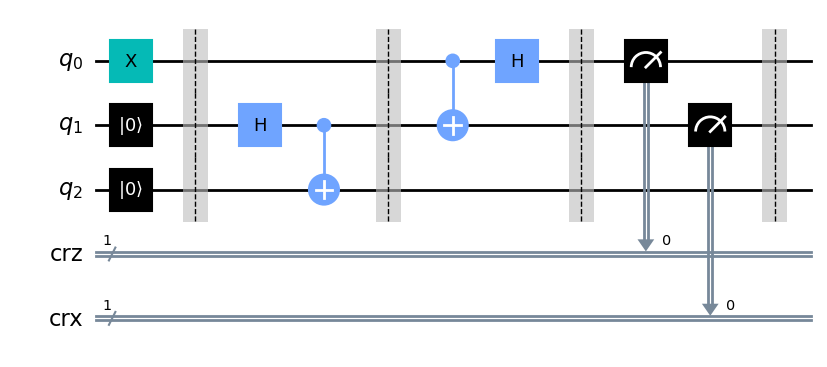

In [26]:
circuit.draw(output='mpl')

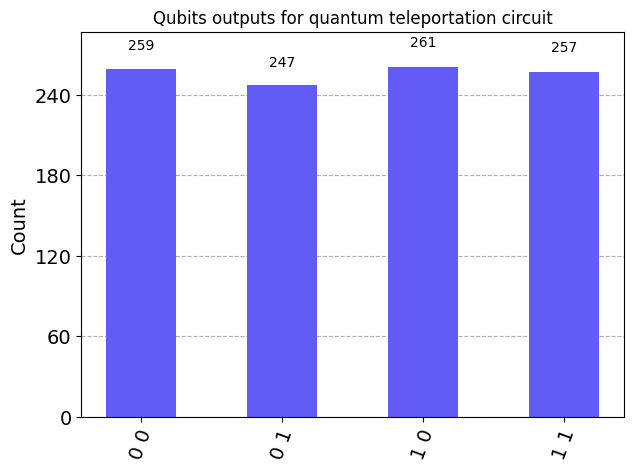

In [27]:
simulator_qasm = Aer.get_backend('qasm_simulator')
simulator_aer = Aer.get_backend("aer_simulator")
result = execute(circuit, backend=simulator_qasm, shots=1024).result()
counts = result.get_counts()

qt.plot_histogram(counts, color="#625BF5", title="Qubits outputs for quantum teleportation circuit")

In [28]:
def bob_gates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz, 1)
    
bob_gates(circuit, 2, crz, crx)

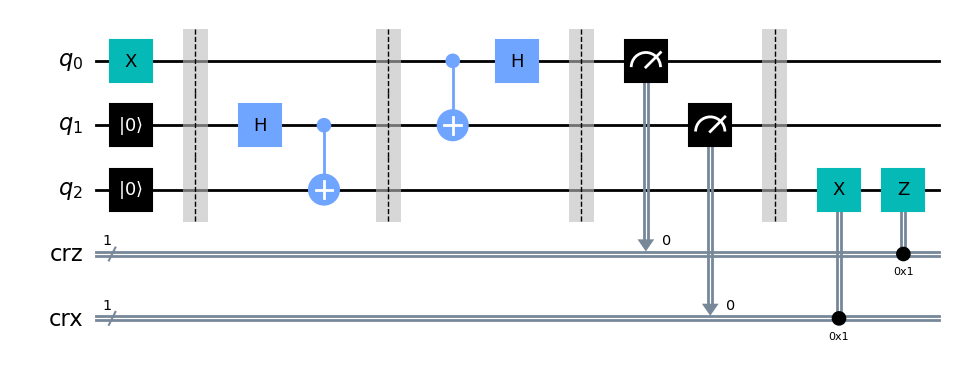

In [29]:
circuit.draw(output='mpl')

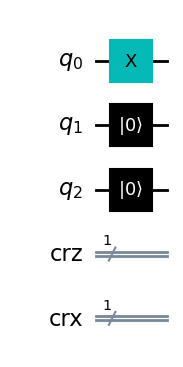

In [30]:
initial.draw(output='mpl')

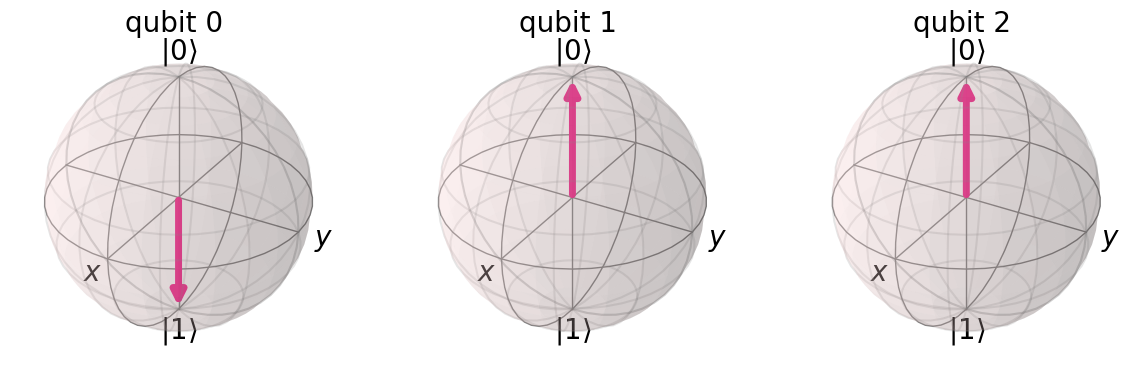

In [31]:
initial.save_statevector()
statevector = simulator_aer.run(initial).result().get_statevector()
qt.plot_bloch_multivector(statevector)


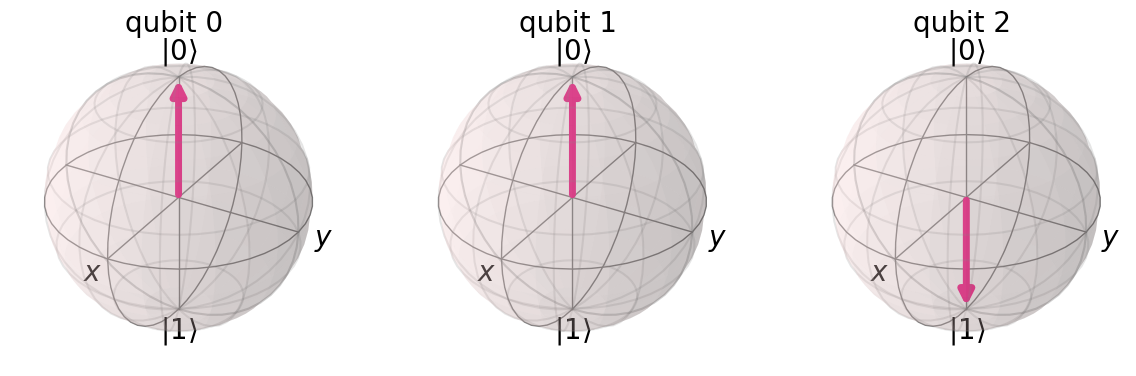

In [32]:
circuit.save_statevector()
statevector2 = simulator_aer.run(circuit).result().get_statevector()
qt.plot_bloch_multivector(statevector2)